# Quadratic Interpolation

The detection of local maxima in a spectrum is 
limited to the DFT support points without further processing.
The following example shows this for a 20.3 Hz sinusoid at 
a sampling rate of 100 Hz. 


<IPython.core.display.Javascript object>


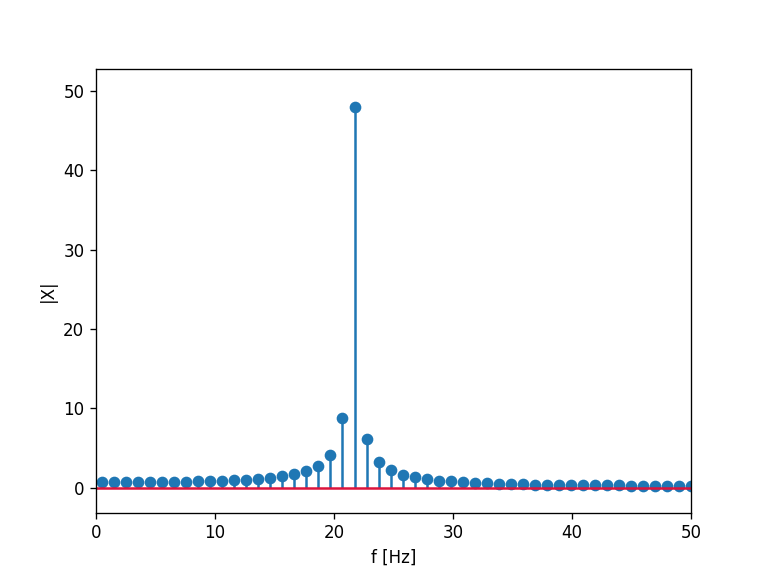

interactive(children=(FloatSlider(value=20.3, description='f0', max=22.0, min=20.0, step=0.01), Output()), _do…

In [49]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib notebook
import numpy as np
from scipy import fftpack
from ipywidgets import *

 
fs = 100
t  = np.linspace(0,1,fs)

f0 = 20.3
x  = np.sin(2*np.pi*fs*f0*t)

 

X = abs(np.fft.fft(x))
X = np.fft.fftshift(X)
f = np.linspace(-fs/2,fs/2,len(X))

fig, ax = plt.subplots()



markers, = ax.plot(f,X, ls="none", marker="o")
baseline = ax.axhline(0, color="crimson")


verts = np.c_[f, np.zeros_like(f), f, X].reshape(len(t),2,2)
col   = LineCollection(verts)
ax.add_collection(col)

ax.set_xlabel('f [Hz]')
ax.set_ylabel('|X|')
ax.set_xlim(0, fs / 2)
ax.set_ylim(None, 110);

def update(f0 = FloatSlider(min = 20.0, max= 22.0, step=0.01, value=20.3,readout=True, readout_format='.2f')):

        # slider value correction by 100
        f0 = f0/100

        x = np.sin(2*np.pi*fs*f0*t)
        X = abs(np.fft.fft(x))
        X = np.fft.fftshift(X)
        f = np.linspace(-fs/2,fs/2,len(X))
        
        markers.set_data(f, X)
        verts = np.c_[f, np.zeros_like(f), f, X].reshape(len(f),2,2)
        col.set_segments(verts)
        ax.set_xlim(0, fs / 2)
        ax.set_ylim(None, 1.1*X.max())
        fig.canvas.draw_idle()

interact(update);


Quadratic or parabolic interpolation can be used to estimate the 
true peak of the sinusoid. using the detected maximum $a$
and its upper and lower frequency bin.

$p = 0.5 * (\alpha-\gamma)/(\alpha-2*\beta+\gamma)$

$a^* =  \beta-1/4*(\alpha-\gamma)*$


[Details on JOS Website](https://ccrma.stanford.edu/~jos/parshl/Peak_Detection_Steps_3.html#sec:peakdet)
